In [1]:
import matplotlib.pyplot as plt

import numpy as np 

import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.style.use("ggplot")

***
# Pyplot 
***
- ***15% A clear and concise overview of the matplotlib.pyplot Python package,
 pitched at your classmates.***
- ***25% An in-depth explanation of three interesting plots from the matplotlib.pyplot
 Python package. You have free reign to choose the three plots yourself.***

## Introduction 
---


Pyplot is a subsection of a module commonly used in python for data analysis and visualisation of plots called matplotlib. The documentation for pyplot can be found here [1].
It is mainly intended to be used for interactive plots and simple cases of plot generation, and is used in web app servers, shells, and Python scripts. In this notebook we are going to look at 3 plots that can be created, as well as give an overview of the package itself.  

[1]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

[2]: https://www.simplilearn.com/tutorials/python-tutorial/matplotlib

## Pyplot overview 
---
Pyplot was created as part of the Matplotlib libraries by John D. Hunter (a neurobiologist [7]) in 2002 [4]  [5].
He originally developed Matplotlib as a patch to fix a problem with IPython, and due to a delay in the patch being reviewed by IPython's creators, he took this as a cue to create a package of his own, releasing the first version in 2003. It received an early boost when the Space Telescope Science Institute adopted it as their plotting package of choice, which provided financial support to the project in its early years of develpoment.

It was developed as an alternative to MATLAB and is a low-level open-source library that is used with python to aid in the visualisation of data, through the use of plots and charts. Some of the key reasons Hunter believed that it became as successful as it did, outliving dozens of competing packages, was due to it's multi-platform support, and the fact it had a coherent vision: "To do 2D graphics, and to do them well" [6]


Pyplot offers a MATLAB-style interface, making it easy for MATLAB users to adapt to Python easier; and it also provides a Statefulness, which means that pyplot stores the state of an object when you first plot it.
This is essential for the module to work correctly in the same loop or session state, and it remains active until plt.close() is encountered in the code. State can also be important when creating several plots continuously. [1]

Matplotlib breaks one of the cardinal rules of programming by providing statefullness. It's generally not recommended for a library to remember a previous command, as stateful processes can result in excessive memory usage and overhead consumption [2]  [3]. However, for Matplotlib, and more specifically pyplot, it allows the user to quickly and effiently create plots. 
    

    
## Object Hierarchy 
 
 One of the fundamental concepts of matplotlib is that of its object hierarchy. A simple plot such as ```plt.plot([1, 2, 3])``` hides the fact that a plot is actually a nested Python object structure. This means that there is a tree-like structure of matplotlib objects underlying each plot.  
 
 The outermost container for a matplotlib graphic which contains multiple Axes objects is called a Figure object. In this instance, an Axes is an individual plot as opposed to the plural of 'axis'. So, in an object hierarchy in matplotlib the Figure object contains one or more Axes/individual plots. Below the Axes for each plot are the smaller objects like tick marks, individual lines, legends, grid lines. Almost every element of a plot is modifiable, down to the ticks on the x and y- axis. Below is a graphic showing the various elements of a plot. [9] 
 
 
 ![](http://www.pybloggers.com/wp-content/uploads/2018/02/files.realpython.comanatomy.7d033ebbfbc8-ed9754f2924c6eb467d96e4ac5e39c1918d43d01.png)
 

 
 
    
## Stateful vs Stateless Matplotlib 
 
 
As previously mentioned, Matplotlib provides both stateful (state-based) and stateless (object-oriented, OO) plotting. It can be difficult to decide which approach to use at what time. The examples from Matplotlib’s documentation use both approaches, but highlight that it is preferable to pick one of them and stick to it. The suggestion is to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting.[11]


### Stateful

Functions such as ```plt.plot()``` are implicitly referring to an existing current Figure and Axes, or creating new ones if none exist. The stateful interface makes calls with this; and other top-level pyplot functions. With stateful plotting there is only ever one figure of axes that is being manipulated at any one time and thus there is no need to explicitly refer to them. 

### Stateless
 
 Contrast this with the object-oriented approach which modifies the underlying objects directly. This is done usually by calling methods of an Axes object explicitly, i.e. the plot. Most of the functions from pyplot also exist as methods of the matplotlib.axes.Axes class.
 Pyplot is home to a batch of functions which are really just wrappers around matplotlib’s object-oriented interface. For example, with ```plt.title()```, there are corresponding setter and getter methods within the OO approach, ```ax.set_title()``` and ```ax.get_title()```. (Use of getters and setters tends to be more popular in languages such as Java, but is a key feature of matplotlib’s OO approach.). 
 
This is a more customisable approach and comes handy as graphs become more complex. For example, calling ```plt.title()``` in a stateful approach gets translated into this one line for stateless: ```gca().set_title(s, \*args, \*\*kwargs)``` [10].
 
 
 
   - gca() grabs the current axis and returns it.
    
    
   - set_title() is a setter method, which sets the title for that Axes object. 
    

Looking at the source for top-level functions like ```plt.grid()```, ```plt.legend()```, and ```plt.ylabels()```, all of them follow the same structure of delegating to the current Axes with gca(), and then calling some method of the current Axes.[10]
 
Interestingly, the only time that the OO approach uses pyplot is to create a Figure and Axes.


    
    
### How Pyplot works 
 
 There are 3 layers of interdependent layers that makes pyplot work- these are: The Scripting layer, the Artist layer, and the Backend layer. We will look at these individually below [8]: 
 
#### Scripting Layer 
 
The top-level object in the scripting layer is matplotlib.pyplot.figure(), otherwise known as the Figure. The figure acts as a container that manages all of the elements in a given plot.

Let’s examine each line in the following script to see how pyplot creates a plot and displays it:

```import matplotlib.pyplot as plt``` This creates a configuration file and a default Figure and Axe are defined. 

```plt.plot([1, 2, 3])``` The plot () command is directed to the matplotlib.axes.Axes.plot function in the backend which provides a unified interface for the different plot types.
In this instance, as a custom figure and Axes hve not been defined, plotting will take place in the default specified by the library. In this case, for example,  Pyplot will assume that [1,2,3] is the y-axis values and automatically generates a corresponding sequence of x values. 

```plt.title(”Simple Plot”)``` The title () command directs to the Axes. set_title finction in the backend and ensures the plot is titled as per the user request. 

```plt.show``` The show () command is directed the matplotlib.figure.Figure.show() fuction in the backend. This function causes the figure to render based on the previous commands in the script, and then display the Figure and its specific elements on screen. 
 
This code is demonstrated below

[1]: https://www.activestate.com/resources/quick-reads/what-is-pyplot-in-matplotlib/

[2]: https://stackoverflow.com/questions/24764918/what-does-it-mean-when-they-say-stateful

[3]: https://stackoverflow.com/questions/59330733/what-are-states-vs-stateless-properties-and-advantages

[4]: https://www.w3schools.com/python/matplotlib_intro.asp

[5]: https://jakevdp.github.io/blog/2013/03/23/matplotlib-and-the-future-of-visualization-in-python/

[6]: http://pyvideo.org/video/1192/matplotlib-lessons-from-middle-age-or-how-you

[7]: https://en.wikipedia.org/wiki/John_D._Hunter

[8]: https://www.activestate.com/resources/quick-reads/what-is-pyplot-in-matplotlib/

[9]: http://www.pybloggers.com/2018/02/python-plotting-with-matplotlib-guide/

[10]: https://medium.com/@The_Gambitier/matplotlib-essentials-e376ed954201

[11]: https://towardsdatascience.com/a-practical-summary-of-matplotlib-in-13-python-snippets-4d07f0011bdf


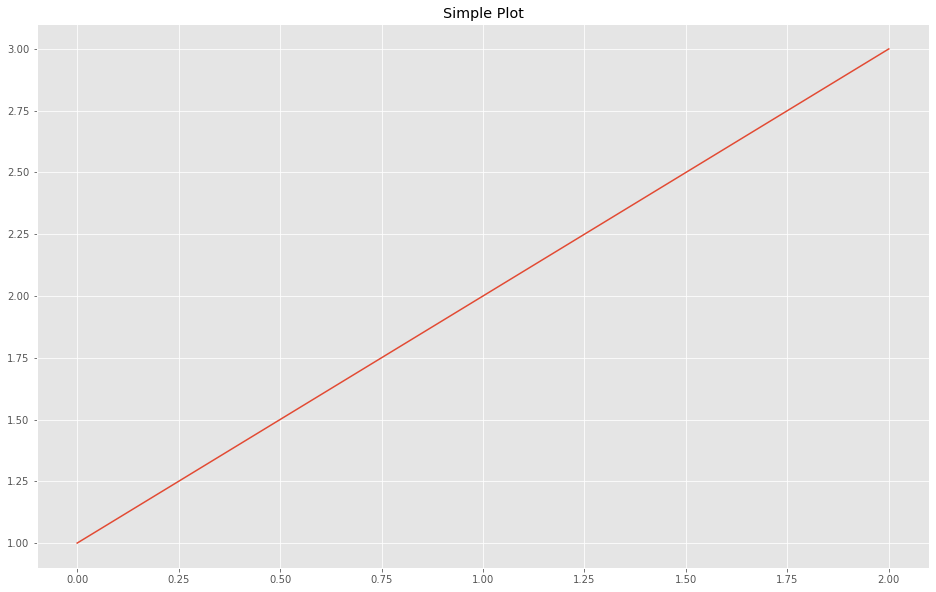

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.title("Simple Plot")
plt.show()

#### Artist Layer

This is used to manipulate elements of a plot, such as adding labels, drawing lines, etc

The artist layer acts as a descriptive medium between pyplot scripts and more complex Python class objects in the other layers. In this layer, abstract interface classes mediate with high level pyplot elements in the scripting layer, represented here as figurative objects in a drawing. It is the layer that knows how to use a renderer to paint onto the canvas (the blank space where the plot will eventually end up). 
There are 2 types of artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure). [2]


 
 ![](https://cdn.activestate.com/wp-content/uploads/2021/01/what-is-pyplot-in-matplotlib-figure-2.png)
 
 
 
#### Backend layer 
 
 This is used to format the plot for display in a specific target application, such as a Jupyter Notebook. The backend layer provides a concrete implementation of the artist layer and its abstraction. The term ‘backend’ is most commonly used to refer to output formats that matplotlib supports, of which there are currently at least 17. [3]  [1]
 
Matplotlib is used in many different ways, and outputted in many different formats. ie, from Python shells, jupyter notebooks, batch scripts or to build rich applications. To support all of these various uses, Matplotlib targets different outputs, and capability for each of these is called a back-end. This "backend" basically does all the hard work behind the scenes to make the figure. 
There are 2 types of backend: User Interface, or interactive, backend; and hardcopy backends, which make the image files 
 
This layer does not normally require user modification as matplotlib will select a default backend for you. The exception to this is if you want to write graphical user interfaces, or a web app server. 



[1]: https://www.activestate.com/resources/quick-reads/what-is-pyplot-in-matplotlib/
[2]: https://matplotlib.org/stable/tutorials/intermediate/artists.html
[3]: https://matplotlib.org/stable/users/explain/backends.html?highlight=what%20backend

## Plot libraries
***
There are numerous plotting functions available in matplotlib. In this section 3 will be investigated. 

These are: 

Histograms

Scatterplots

Pie charts vs Bar Charts 



### Histograms

Histograms are approximate representations of the distribution of numerical data. They give a rough sense of the density of the underlying distribution of the data, and are often used for density estimation: estimating the probability density function of the underlying variable. 

It was first introduced by Karl Pearson, an English mathematician in 1895.[1].

A histogram is divided into bins, or buckets. These bins represent the range of values being measured. I.e. the entire range of values is divided evenly into a series of intervals. The bins are usually specified as consecutive and non-overlapping. They must be adjacent and are normally of equal size. If they are not, it should be noted that it is the area of the bin that determines the frequency of cases in this type of plot, not height of the bin. As the adjacent bins leave no gaps, the rectangles of a histogram touch each other to indicate that the original variable is continuous.


The number of bins chosen, and bin widths can impact your histogram. Too many bins and your data can look messy and identifying a correlation can be made difficult. Too few and important facts about the data can be missed. There is no hard and fast rule around "right" number of bins however there are a few helpful guidelines to make it easier to decide.

- Ideally, bins should be all the same size. For example, groups of ten or a hundred.
- Bins should include all of the data, even outliers.
- Boundaries for bins should land at whole numbers whenever possible (this makes the chart easier to read).
- If at all possible, try to make your data set evenly divisible by the number of bins. For example, if you have 10 pieces of data, work with 5 bins instead of 6 or 7.

There are a number of different rules and formulae (Sturges formula, Rice rule, etc), however these all have issues and limitations and so experimentation is usually needed to determine the appropriate width. [2]




[1]: https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-32833-1_178
[2]: https://en.wikipedia.org/wiki/Histogram
[3]: https://www.statisticshowto.com/choose-bin-sizes-statistics/

In [4]:
# Read in the Iris Dataset
df = pd.read_csv("https://raw.githubusercontent.com/kaob1991/pands-project2021/main/iris_csv.csv")

In [5]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Pie Charts vs Bar Charts 
***
A Pie chart is a circular statistical graphic, first used in 1801 by William Playfair (a Scottish Engineer). He argued that data was better communicated via charts and graphs and is generally credited with the creation of bar charts also.

The use of pie charts in mass media and business is widespread, although they recieve wide criticism from statisticians who argue that there is many limitations to them. Chief among the complaints is the fact that it can be difficult to compare the different sections of a given pie chart, or indeed, even more difficult to compare between more than 1. 

An obvious flaw with pie charts is that it is not visually practical to show more than a few variables with the pie chart before they become too difficult to read. When slices become to small they have to be differntiated using colours, textures or arrows so that the user can understand them. 

On top of that, it has been shown that it is more difficult for comparisons to be made between the size of items in a chart when area is used instead of length [2]

An alternative that is commonly used instead of the pie chart is the Bar Chart. This was created, also by William Playfair, slightly earlier in 1786. It is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. As the bars are all the same width, it makes it far easier and clearer to see the data as the height difference (in most cases) is clearly observable.
Bar charts have a number of clear advantages that make them widely used in business/media. They are useful to make comparisons between data, and are easily understood. They can also summarise large data sets, and clarify trends better than tables. However, there are a few drawbacks that need to be taken into consideration. Bar charts can be easily manipulated to create a false impression, and they fail to reveal key assumptions which means that a bar chart normally requires further explanation. Additionally, care must be taken when designing a bar chart for the data to ensure that reading the values is as clear as possible. This might be through adding a grid to the figure in ```pyplot``` or ticks in the axes to make it clearer. 


Stacked bar

[1]: http://www.perceptualedge.com/articles/08-21-07.pdf

[2]: https://en.wikipedia.org/wiki/Pie_chart

[3]: https://en.wikipedia.org/wiki/Bar_chart

[4]: https://geographyfieldwork.com/DataPresentationBarCharts.htm

[5]: https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/bar-chart-bar-graph-examples/

(-1.2234799609229852,
 1.3132711721887536,
 -1.1907817978749649,
 1.2175329955018517)

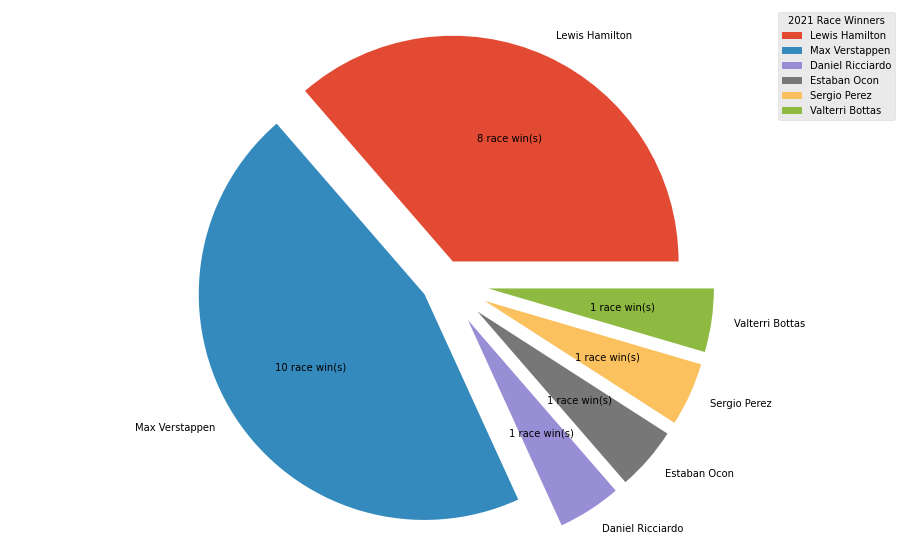

In [6]:
f1_2021= ["Lewis Hamilton", "Max Verstappen", "Daniel Ricciardo", "Estaban Ocon", "Sergio Perez", "Valterri Bottas"]
results = [8, 10, 1, 1, 1, 1]
explode = [0.1,0.1,0.2,0.2,0.2,0.2]
def make_autopct(results):
    def my_autopct(pct):
        total = sum(results)
        val = int(round(pct*total/100.0))
        #return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return "{v} race win(s)".format(v = val)
    return my_autopct
plt.pie(results, labels = f1_2021,autopct= make_autopct(results), explode = explode)
plt.legend(title= "2021 Race Winners")
plt.axis('equal')

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

- https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship#Results_and_standings

- https://coderedirect.com/questions/244932/how-do-i-use-matplotlib-autopct (this is where i changed labels)

- https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

<BarContainer object of 6 artists>

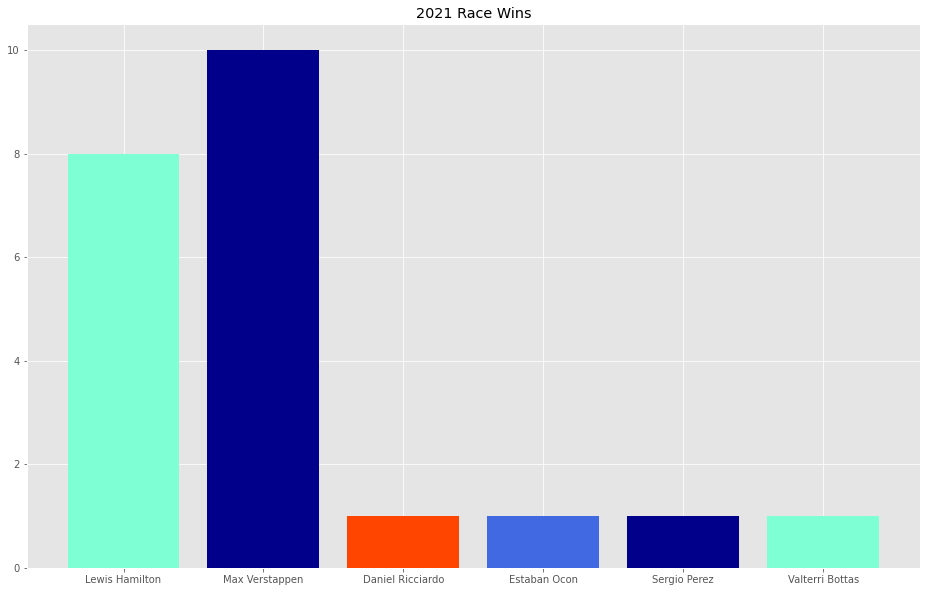

In [7]:
colors = ["aquamarine", "darkblue", "orangered", "royalblue", "darkblue", "aquamarine"]
plt.title("2021 Race Wins")
plt.bar(f1_2021, results, color = colors)


<!--bibtex



@misc{WinNT,
  title = {{MS Windows NT} Kernel Description},
  howpublished = {\url{http://web.archive.org/web/20080207010024/http://www.808multimedia.com/winnt/kernel.htm}},
  note = {Accessed: 2010-09-30}
}


 @misc{matplotlib1, title={matplotlib.pyplot¶}, url={https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html}, journal={matplotlib.pyplot - Matplotlib 3.4.3 documentation}
 } 
 



-->


## References: 

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

- https://mybinder.readthedocs.io/en/latest/using/config_files.html  

- https://www.markdownguide.org/basic-syntax/#urls-and-email-addresses
    
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

- https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.3.4-Reference-Links

- https://www.activestate.com/resources/quick-reads/what-is-pyplot-in-matplotlib/

- https://stackoverflow.com/questions/24764918/what-does-it-mean-when-they-say-stateful

- https://stackoverflow.com/questions/59330733/what-are-states-vs-stateless-properties-and-advantages

- https://www.w3schools.com/python/matplotlib_intro.asp

- https://jakevdp.github.io/blog/2013/03/23/matplotlib-and-the-future-of-visualization-in-python/

- http://pyvideo.org/video/1192/matplotlib-lessons-from-middle-age-or-how-you

- https://en.wikipedia.org/wiki/John_D._Hunter

- https://www.activestate.com/resources/quick-reads/what-is-pyplot-in-matplotlib/

- http://www.pybloggers.com/2018/02/python-plotting-with-matplotlib-guide/

- https://medium.com/@The_Gambitier/matplotlib-essentials-e376ed954201

- https://towardsdatascience.com/a-practical-summary-of-matplotlib-in-13-python-snippets-4d07f0011bdf

- https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship#Results_and_standings

- https://coderedirect.com/questions/244932/how-do-i-use-matplotlib-autopct (this is where i changed labels)

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

- https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

- https://en.wikipedia.org/wiki/William_Playfair

- http://www.perceptualedge.com/articles/08-21-07.pdf

- https://www.stevefenton.co.uk/2009/04/pie-charts-are-bad/


# End